# Roman Yakymiv KN-410 #6

In [1]:
import numpy as np
import cv2
from PIL import Image
from google.colab.patches import cv2_imshow


/Users/ry/opt/anaconda3/envs/ComputerVision/lib/python3.8/site-packages/google/colab/data_table.py:30: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  from IPython.utils import traitlets as _traitlets


In [2]:
examples = [{"train": cv2.imread('/Users/ry/Downloads/cv_lab2_img/metallica_albums.jpg', 0),
            "test": cv2.imread('/Users/ry/Downloads/cv_lab2_img/st_anger.jpg', 0)}]

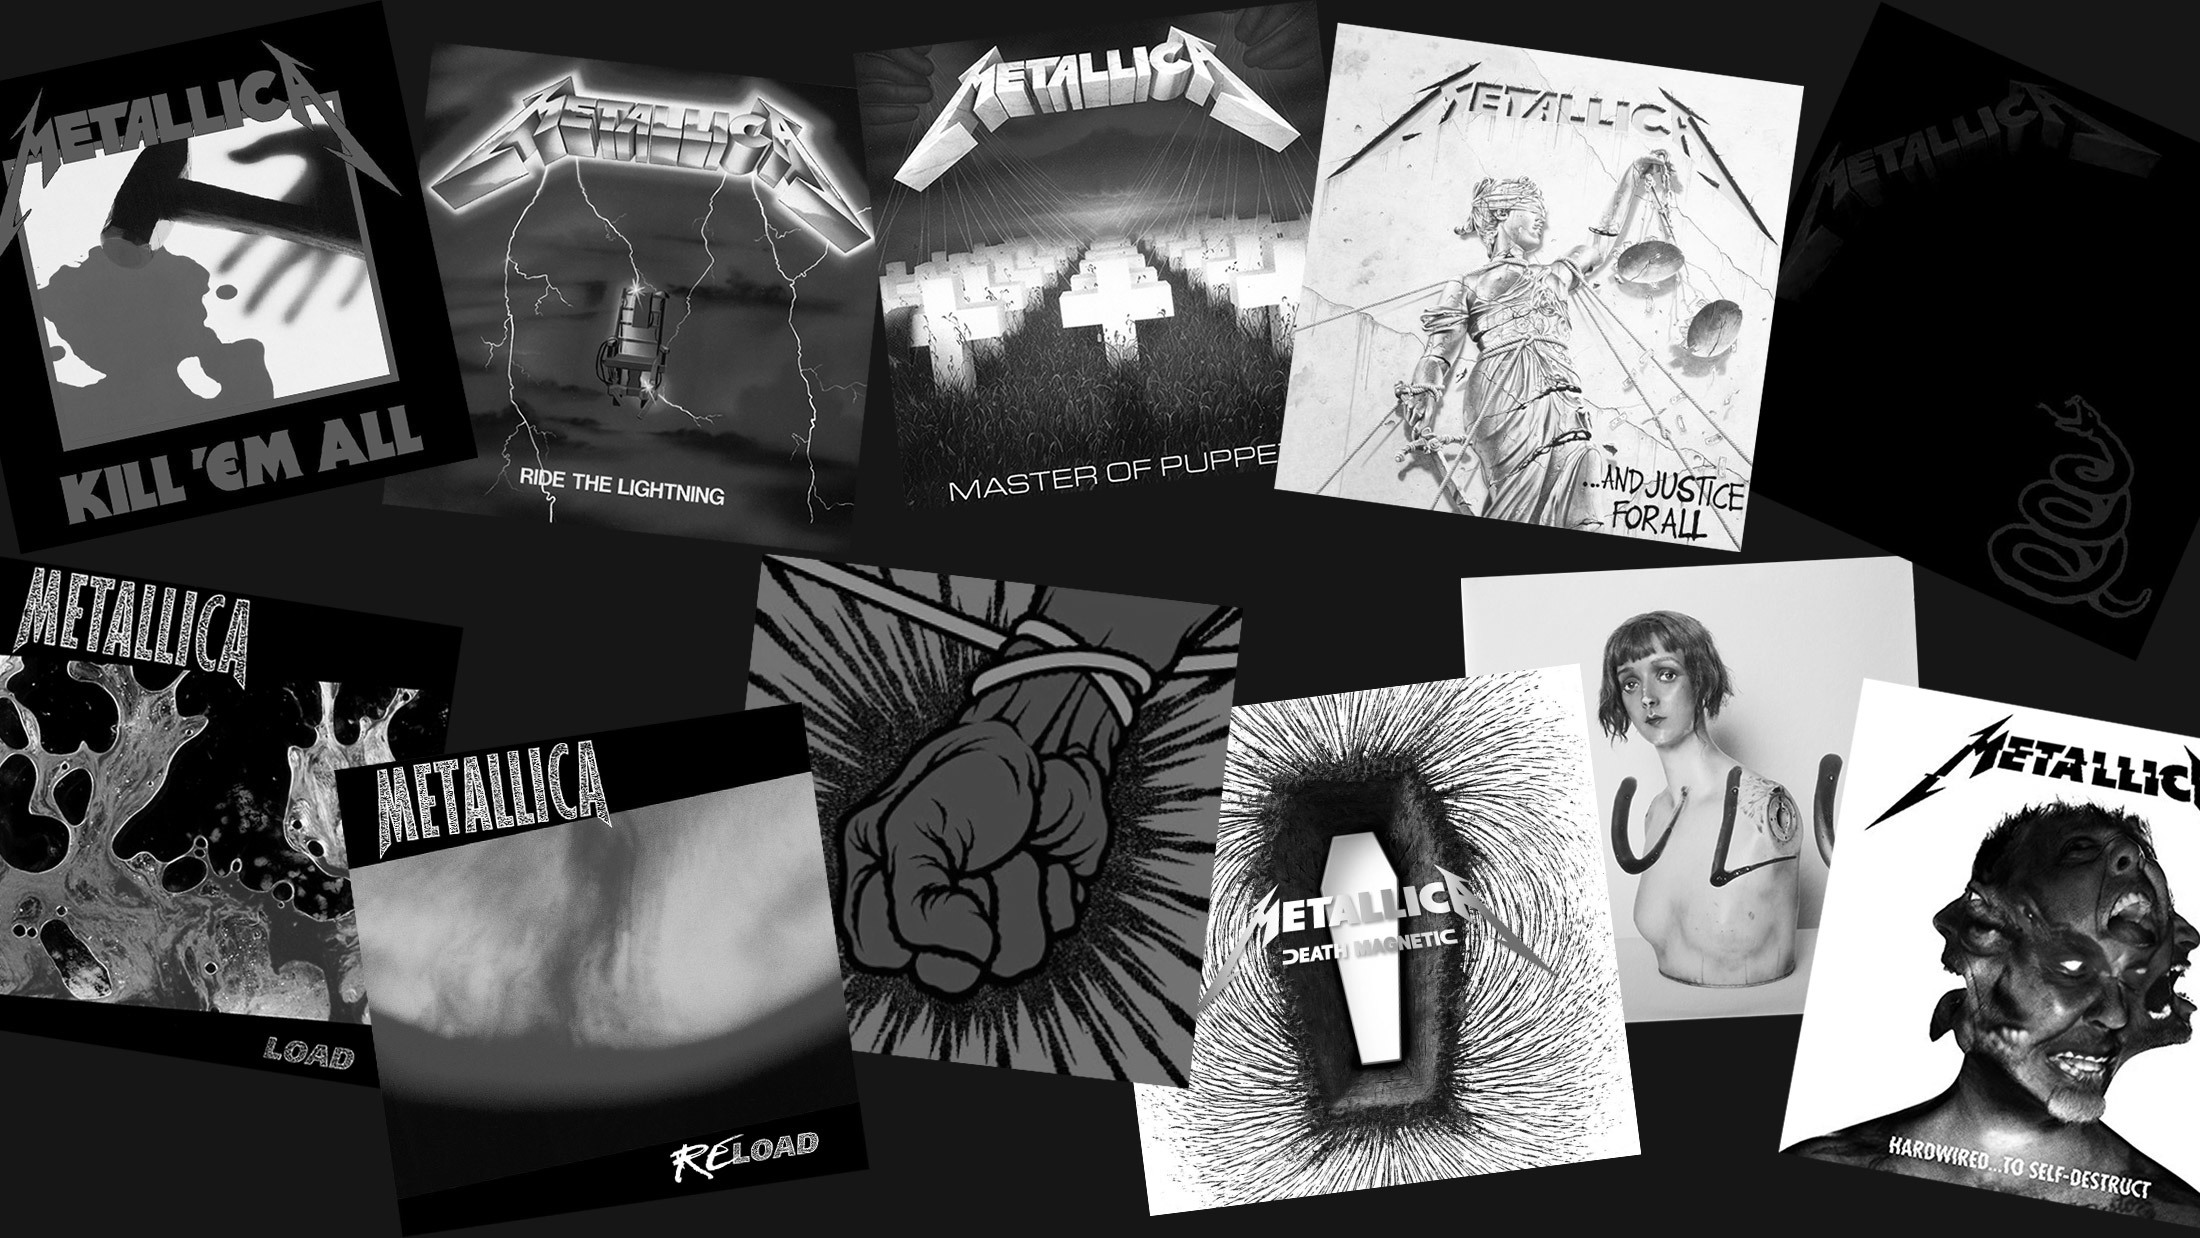

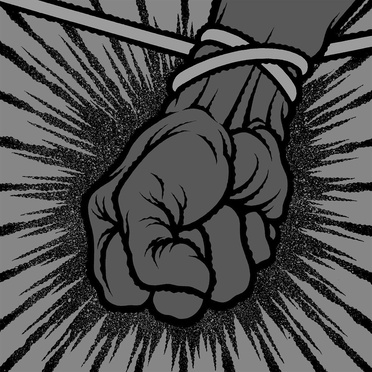

In [3]:
for example in examples:
    cv2_imshow(example["train"])
    cv2_imshow(example["test"])

In [4]:
def daisy(img1, img2):
    fast = cv2.FastFeatureDetector_create()
    daisy = cv2.xfeatures2d.DAISY_create()

    kps1 = fast.detect(img1)
    kps1, descrs1 = daisy.compute(img1, kps1)

    kps2 = fast.detect(img2)
    kps2, descrs2 = daisy.compute(img2, kps2)

    return kps1, kps2, descrs1, descrs2

In [5]:
def cv2_BFM(kp1, des1, kp2, des2, img1, img2):
    bf = cv2.BFMatcher(cv2.NORM_L1)
    matches = bf.match(des1,des2)

    best_matches = sorted(matches, key=lambda x:x.distance)

    output_image = cv2.drawMatches(img1, kp1, img2, kp2, best_matches[:20], None, flags=2)

    cv2_imshow(output_image)

In [6]:
def custom_BFM(kp1, des1, kp2, des2, img1, img2):
    matches = []
    for i, k1 in enumerate(desc1):
        for j, k2 in enumerate(desc2):
            matches.append(cv2.DMatch(_distance=np.linalg.norm(k1 - k2), _imgIdx=0, _queryIdx=i, _trainIdx=j))
    
    matches = sorted(matches, key=lambda x: x.distance)

    best_matches = sorted(matches, key=lambda x:x.distance)

    output_image = cv2.drawMatches(img1, kp1, img2, kp2, best_matches[:20], None, flags=2)

    cv2_imshow(output_image)



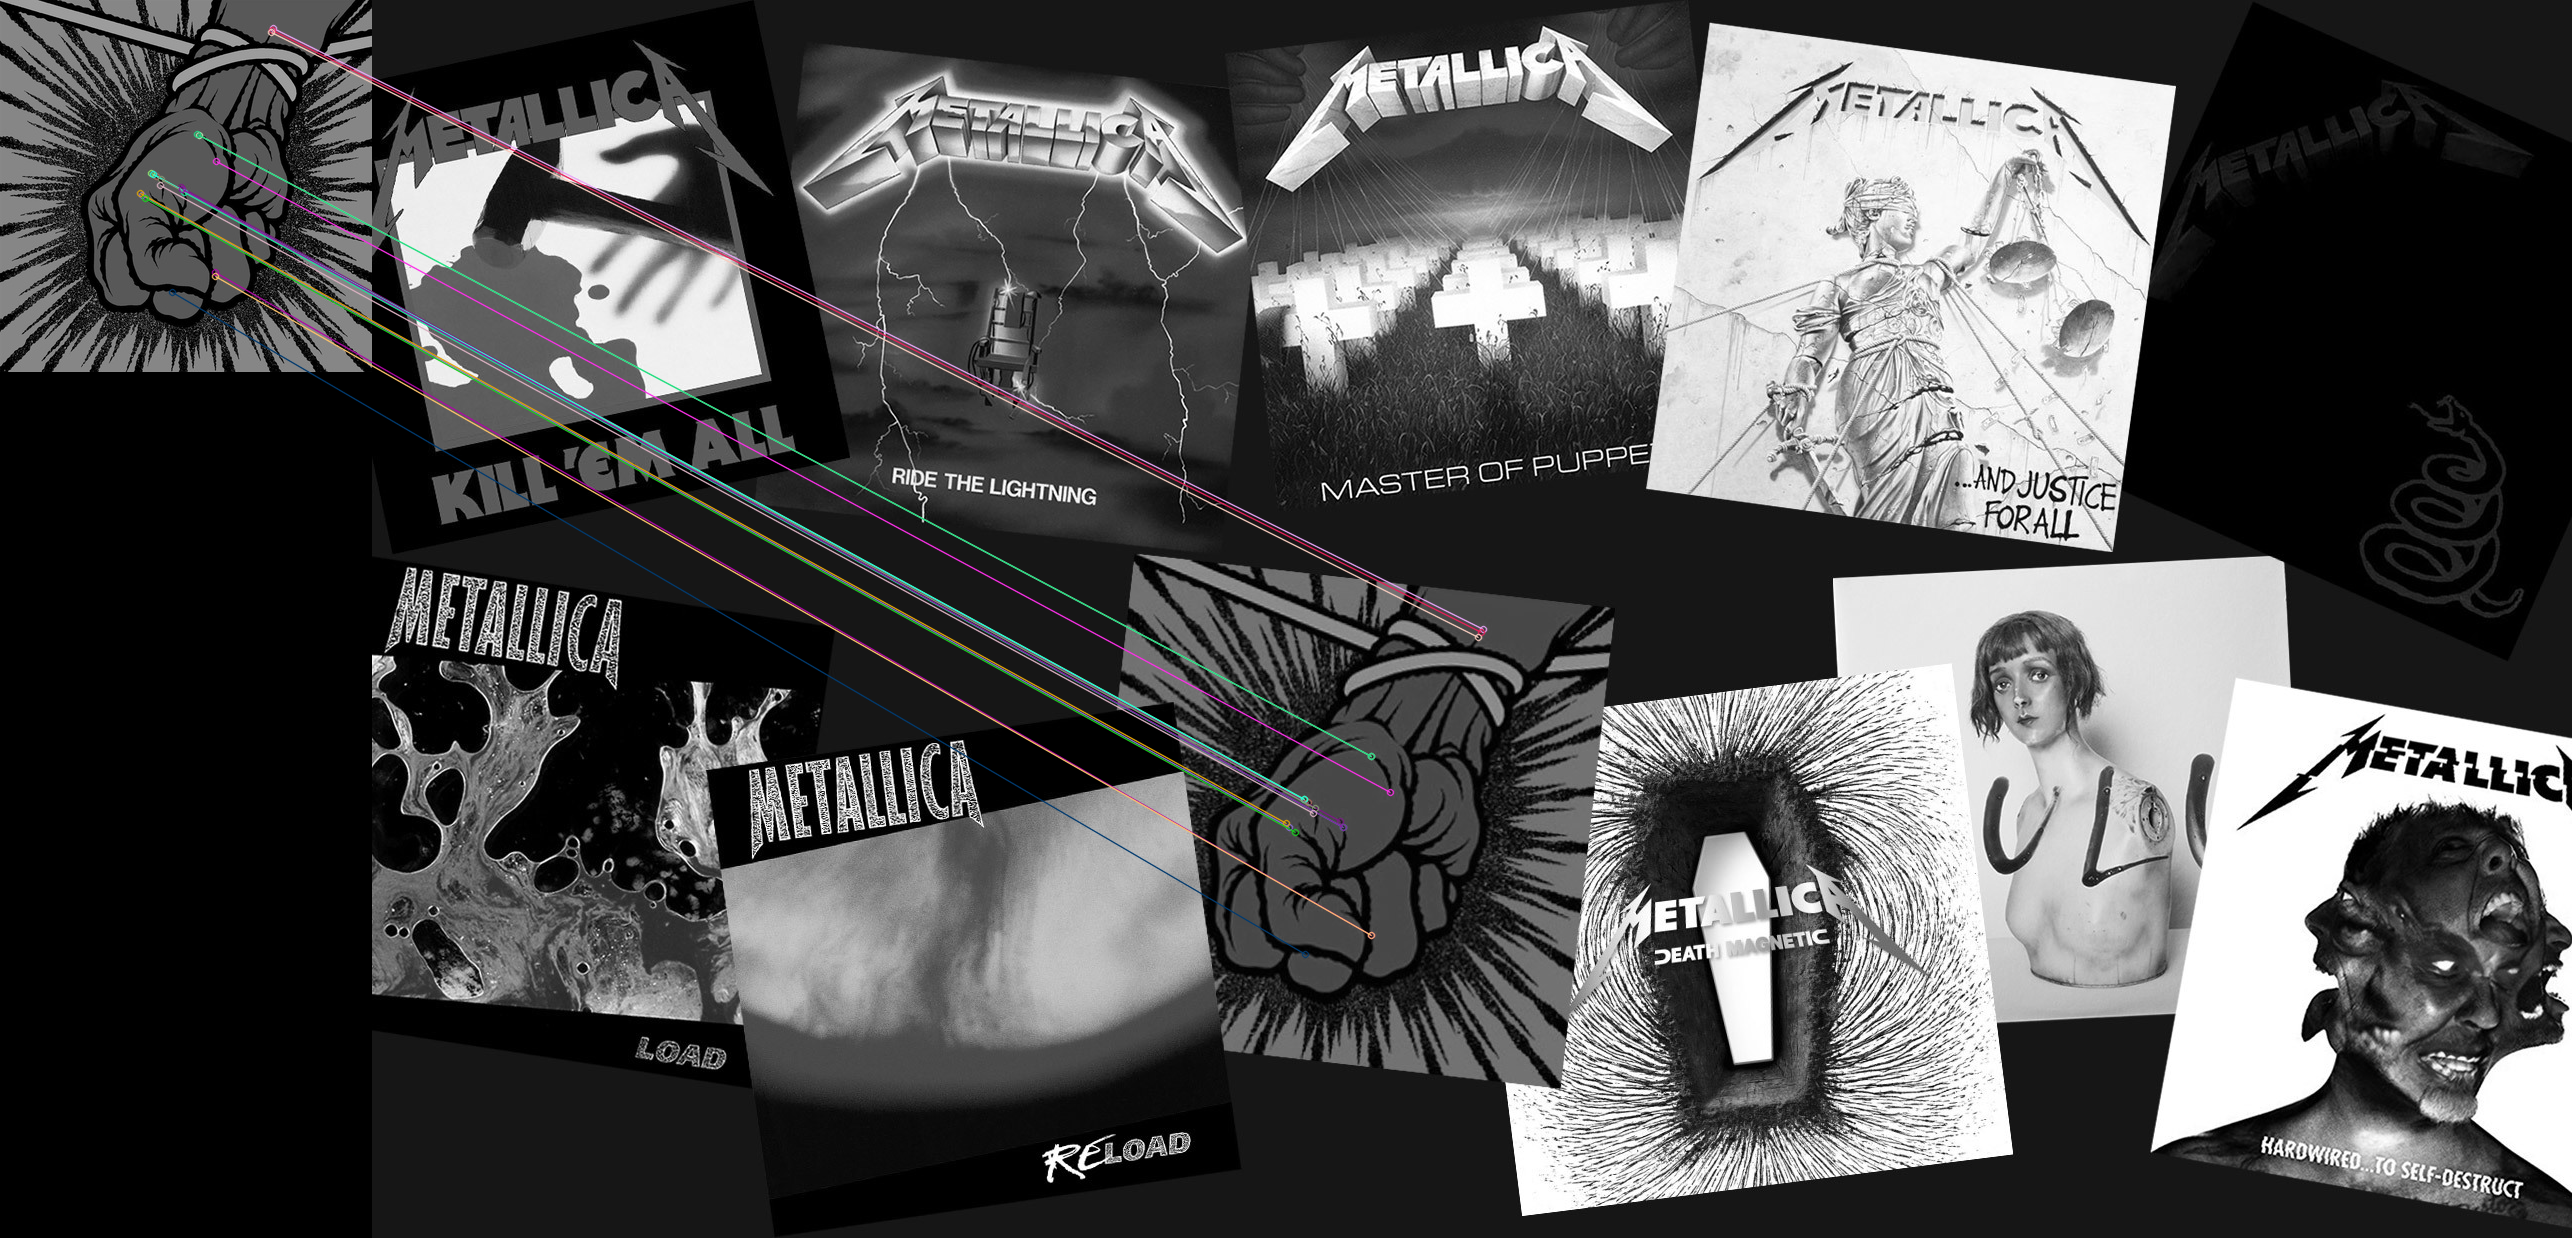

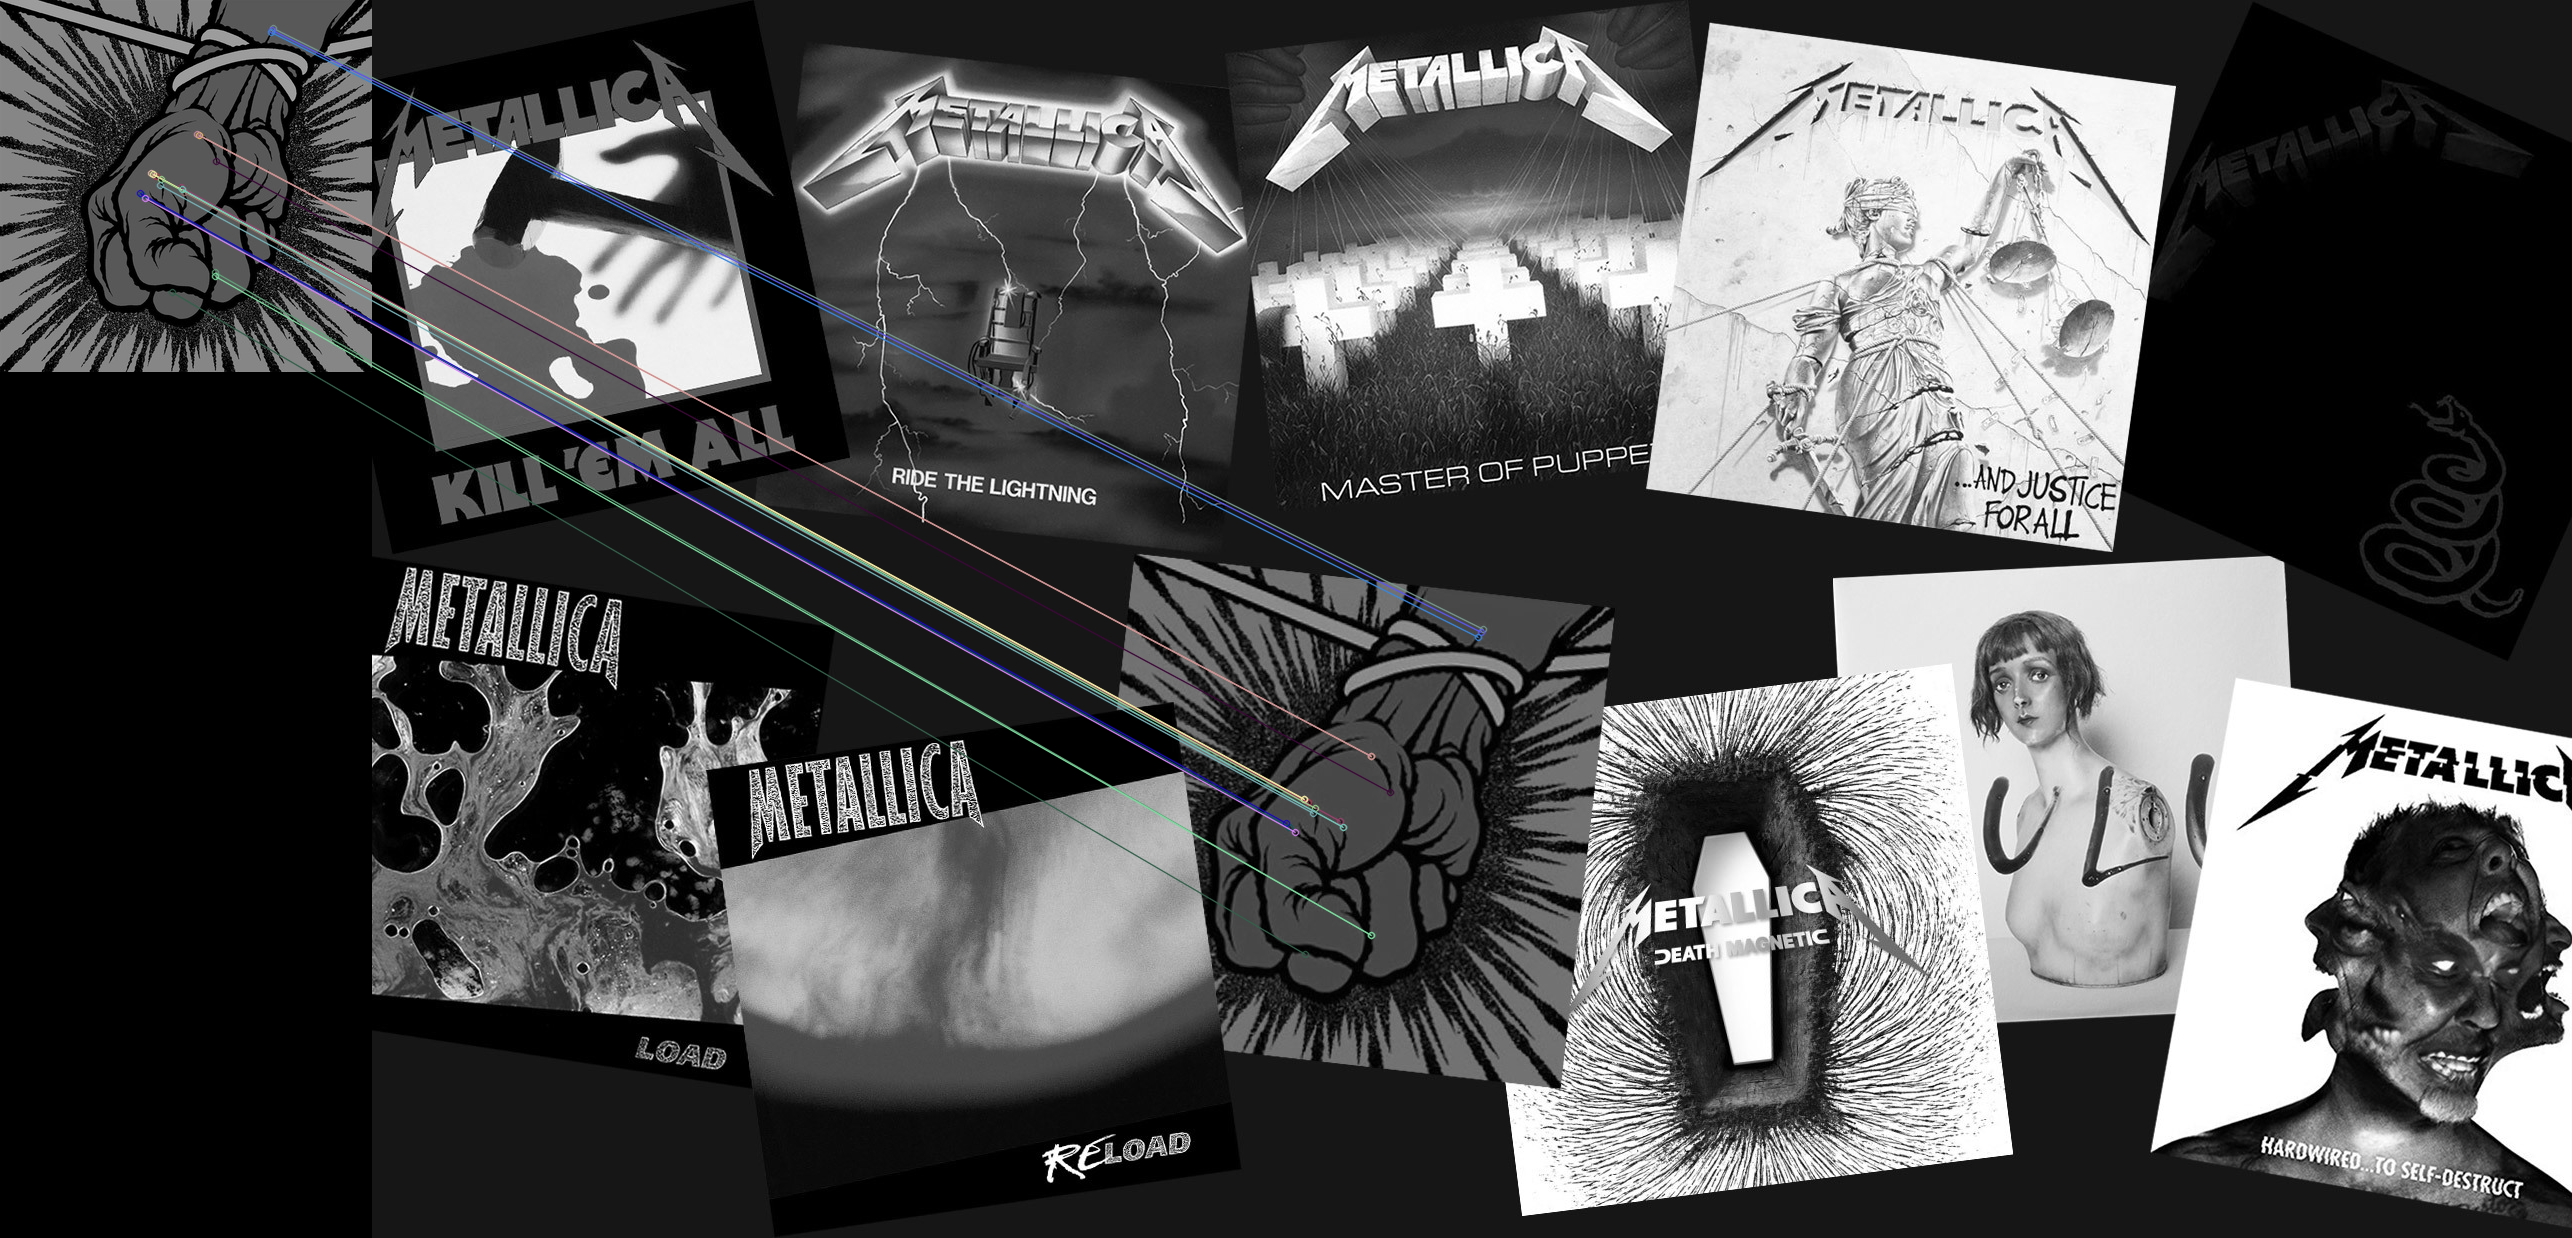

In [7]:
for example in examples:
    kp1, kp2, desc1, desc2 = daisy(example["test"], example["train"])
    cv2_BFM(kp1, desc1, kp2, desc2, example["test"], example["train"])
    custom_BFM(kp1, desc1, kp2, desc2, example["test"], example["train"])

